In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_path='/content/drive/MyDrive/DL/CNN/Face Age Gender Classification/age_gender.csv'
df = pd.read_csv(dataset_path)
df.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [4]:
def count_graph(s):
  sns.countplot(data=df, x=s)
  plt.xticks(rotation=90)

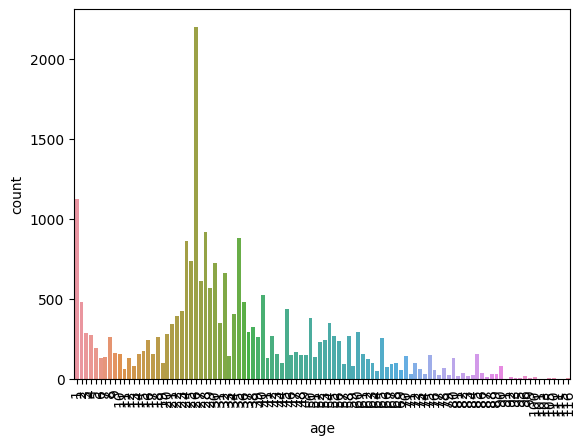

In [5]:
count_graph('age')

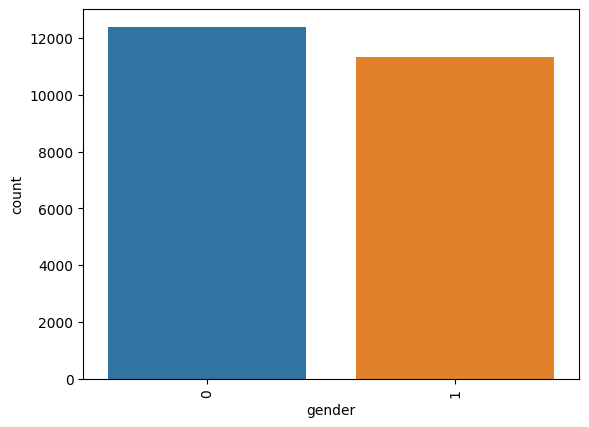

In [6]:
count_graph('gender')

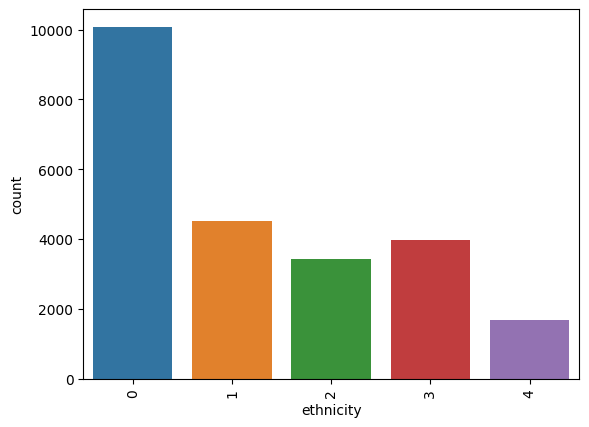

In [7]:
count_graph('ethnicity')

In [32]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [9]:
df['pixels'] = df['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32))

In [10]:
# Reshape images for CNN
X = np.array(df['pixels'].to_list())
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)
# Normalise images
if np.max(X_reshaped) > 1: X_reshaped = X_reshaped / 255

In [11]:
X_reshaped.shape

(23705, 48, 48, 1)

In [12]:
X_reshaped[0]

array([[[0.5058824 ],
        [0.5019608 ],
        [0.5019608 ],
        ...,
        [0.4627451 ],
        [0.3882353 ],
        [0.20784314]],

       [[0.50980395],
        [0.5058824 ],
        [0.5019608 ],
        ...,
        [0.45882353],
        [0.38431373],
        [0.20392157]],

       [[0.5137255 ],
        [0.5058824 ],
        [0.50980395],
        ...,
        [0.44705883],
        [0.38039216],
        [0.19607843]],

       ...,

       [[0.4745098 ],
        [0.5411765 ],
        [0.5764706 ],
        ...,
        [0.5921569 ],
        [0.5882353 ],
        [0.5803922 ]],

       [[0.45882353],
        [0.5372549 ],
        [0.57254905],
        ...,
        [0.58431375],
        [0.5803922 ],
        [0.5803922 ]],

       [[0.4509804 ],
        [0.5294118 ],
        [0.5568628 ],
        ...,
        [0.57254905],
        [0.57254905],
        [0.57254905]]], dtype=float32)

###AGE SEQUENTIAL

In [13]:
y = df['age'].values
y.shape

(23705,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=53)

In [15]:
age_model = Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=(48,48,1), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.4))
age_model.add(Dense(1))


In [16]:
age_model.compile(optimizer='adam', loss='mean_absolute_error')

age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 128)       0         
 g2D)                                                            
                                                        

In [17]:
callbacks = [EarlyStopping(patience=10,
                               min_delta=0.001,
                               restore_best_weights=True),
             ReduceLROnPlateau(patience = 2,
                               verbose=1,
                               factor=0.5,
                               min_lr = 0.0001)]

In [18]:
history = age_model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=28,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))

Epoch 1/50
678/678 [==============================] - 23s 13ms/step - loss: 11.0763 - val_loss: 16.6441 - lr: 0.0010
Epoch 2/50
678/678 [==============================] - 8s 12ms/step - loss: 8.9319 - val_loss: 7.6530 - lr: 0.0010
Epoch 3/50
678/678 [==============================] - 8s 12ms/step - loss: 8.3506 - val_loss: 7.8722 - lr: 0.0010
Epoch 4/50
678/678 [==============================] - ETA: 0s - loss: 7.9750
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
678/678 [==============================] - 8s 12ms/step - loss: 7.9750 - val_loss: 9.1014 - lr: 0.0010
Epoch 5/50
678/678 [==============================] - 8s 12ms/step - loss: 7.3504 - val_loss: 6.6844 - lr: 5.0000e-04
Epoch 6/50
678/678 [==============================] - 8s 12ms/step - loss: 7.0866 - val_loss: 6.4515 - lr: 5.0000e-04
Epoch 7/50
678/678 [==============================] - 9s 13ms/step - loss: 6.9141 - val_loss: 7.4570 - lr: 5.0000e-04
Epoch 8/50
677/678 [=========================

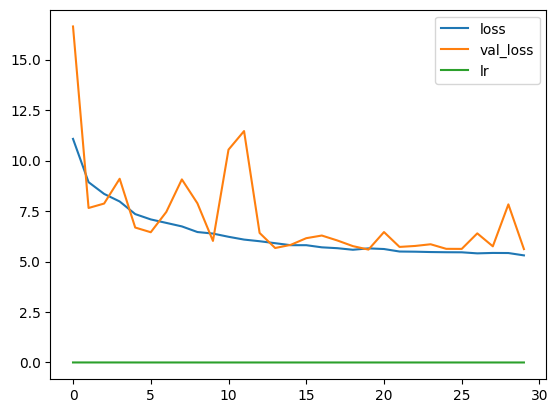

In [19]:
pd.DataFrame(history.history).plot();

In [20]:
y_pred = age_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("MAE: {:.4f}".format(mean_absolute_error(y_test, y_pred)))
print("R2 score: {:.4f}".format(r2))

149/149 [==============================] - 1s 4ms/step
MAE: 5.5919
R2 score: 0.8428


###GENDER SEQUENTIAL

In [21]:
y = df['gender'].values
y.shape

(23705,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=53)

In [23]:
gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=(48,48,1), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.3))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.3))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())
gender_model.add(Dense(128, activation='relu'))
gender_model.add(Dropout(0.4))
gender_model.add(Dense(1,activation='sigmoid'))


In [24]:
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 23, 23, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 23, 23, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 11, 11, 128)       0         
 g2D)                                                            
                                                      

In [25]:
callbacks = [EarlyStopping(patience=10,
                               min_delta=0.001,
                               restore_best_weights=True),
             ReduceLROnPlateau(patience = 2,
                               verbose=1,
                               factor=0.5,
                               min_lr = 0.0001)]

In [26]:
history = gender_model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=28,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))

Epoch 1/50
678/678 [==============================] - 12s 13ms/step - loss: 0.4820 - accuracy: 0.7787 - val_loss: 0.4305 - val_accuracy: 0.7752 - lr: 0.0010
Epoch 2/50
678/678 [==============================] - 9s 13ms/step - loss: 0.3305 - accuracy: 0.8546 - val_loss: 0.4371 - val_accuracy: 0.7834 - lr: 0.0010
Epoch 3/50
678/678 [==============================] - 9s 14ms/step - loss: 0.2928 - accuracy: 0.8734 - val_loss: 0.2793 - val_accuracy: 0.8861 - lr: 0.0010
Epoch 4/50
678/678 [==============================] - 8s 12ms/step - loss: 0.2638 - accuracy: 0.8850 - val_loss: 0.2606 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 5/50
678/678 [==============================] - 9s 13ms/step - loss: 0.2483 - accuracy: 0.8895 - val_loss: 0.2795 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 6/50
675/678 [============================>.] - ETA: 0s - loss: 0.2314 - accuracy: 0.9005
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
678/678 [==============================] - 8s 1

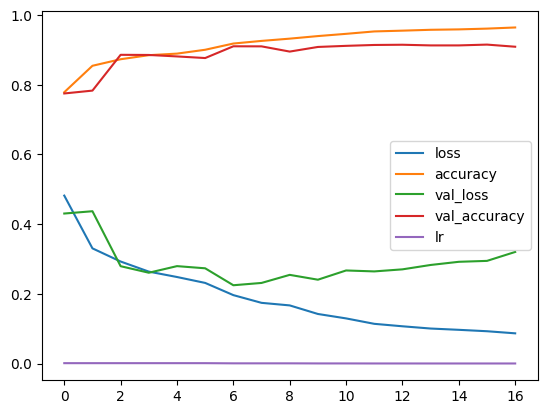

In [27]:
pd.DataFrame(history.history).plot();

###AGE, GENDER FUNCTIONAL

In [91]:
y = df[['age','gender']].values
y_gender=df['gender'].values
y_age=df['age'].values
y_age.shape

(23705,)

In [92]:
X_train, X_test, y_train_gender, y_test_gender, y_train_age, y_test_age = train_test_split(X_reshaped, y_gender,y_age, test_size=0.2, random_state=53)

In [93]:
input_layer=Input(shape=(48,48,1),name='Input_layer')

x=Conv2D(64, kernel_size=(3,3), activation='relu')(input_layer)
x=MaxPooling2D(pool_size=(2,2))(x)
x=BatchNormalization()(x)

x=Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.3)(x)
x=BatchNormalization()(x)

x=Conv2D(256, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.3)(x)
x=BatchNormalization()(x)

x=Conv2D(512, kernel_size=(3,3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.5)(x)
x=BatchNormalization()(x)

x=Flatten()(x)

#age
age_out=Dense(128, activation='relu')(x)
age_out=Dropout(0.4)(age_out)
age_out=Dense(1,activation='linear',name='age_out')(age_out)

#gender
gender_out=Dense(128, activation='relu')(x)
gender_out=Dropout(0.4)(gender_out)
gender_out=Dense(1,activation='sigmoid',name='gender_out')(gender_out)

model=Model(inputs=input_layer, outputs=[age_out,gender_out])

In [94]:
model.compile(optimizer='adam', loss={'age_out':'mean_absolute_error','gender_out':'binary_crossentropy'}, metrics={'age_out':'mean_absolute_error','gender_out':'accuracy'})

model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input_layer (InputLayer)    [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d_42 (Conv2D)          (None, 46, 46, 64)           640       ['Input_layer[0][0]']         
                                                                                                  
 max_pooling2d_42 (MaxPooli  (None, 23, 23, 64)           0         ['conv2d_42[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 batch_normalization_46 (Ba  (None, 23, 23, 64)           256       ['max_pooling2d_42[0][0]

In [95]:
callbacks = [EarlyStopping(patience=10,
                               min_delta=0.001,
                               restore_best_weights=True),
             ReduceLROnPlateau(patience = 2,
                               verbose=1,
                               factor=0.5,
                               min_lr = 0.0001)]

In [96]:
history = model.fit(X_train,
                        {'age_out': y_train_age, 'gender_out': y_train_gender},
                        epochs=50,
                        batch_size=64,
                        callbacks=callbacks,
                        validation_data=(X_test, {'age_out': y_test_age, 'gender_out': y_test_gender})
                        )

# model.fit(X_train, {'age_out': y_train_age, 'gender_out': y_train_gender},
#           epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/50
297/297 [==============================] - 10s 23ms/step - loss: 11.7205 - age_out_loss: 11.1490 - gender_out_loss: 0.5715 - age_out_mean_absolute_error: 11.1490 - gender_out_accuracy: 0.7188 - val_loss: 34.8603 - val_age_out_loss: 34.1336 - val_gender_out_loss: 0.7267 - val_age_out_mean_absolute_error: 34.1336 - val_gender_out_accuracy: 0.4845 - lr: 0.0010
Epoch 2/50
297/297 [==============================] - 6s 21ms/step - loss: 9.1219 - age_out_loss: 8.6819 - gender_out_loss: 0.4400 - age_out_mean_absolute_error: 8.6819 - gender_out_accuracy: 0.7932 - val_loss: 28.9233 - val_age_out_loss: 28.3608 - val_gender_out_loss: 0.5625 - val_age_out_mean_absolute_error: 28.3608 - val_gender_out_accuracy: 0.6591 - lr: 0.0010
Epoch 3/50
297/297 [==============================] - 6s 21ms/step - loss: 8.5026 - age_out_loss: 8.1047 - gender_out_loss: 0.3979 - age_out_mean_absolute_error: 8.1047 - gender_out_accuracy: 0.8119 - val_loss: 11.9972 - val_age_out_loss: 11.5546 - val_gender_ou

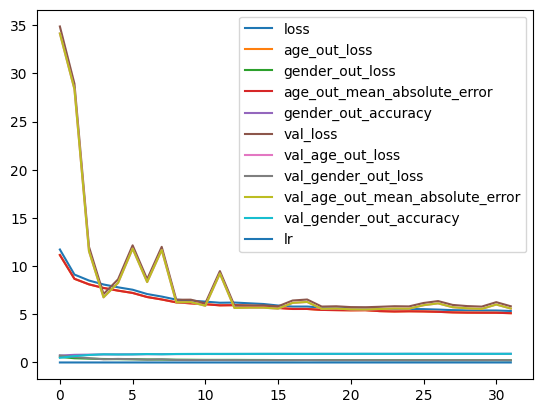

In [97]:
pd.DataFrame(history.history).plot();

Text(0.5, 1.0, 'val_loss- 0.235 and loss- 0.248')

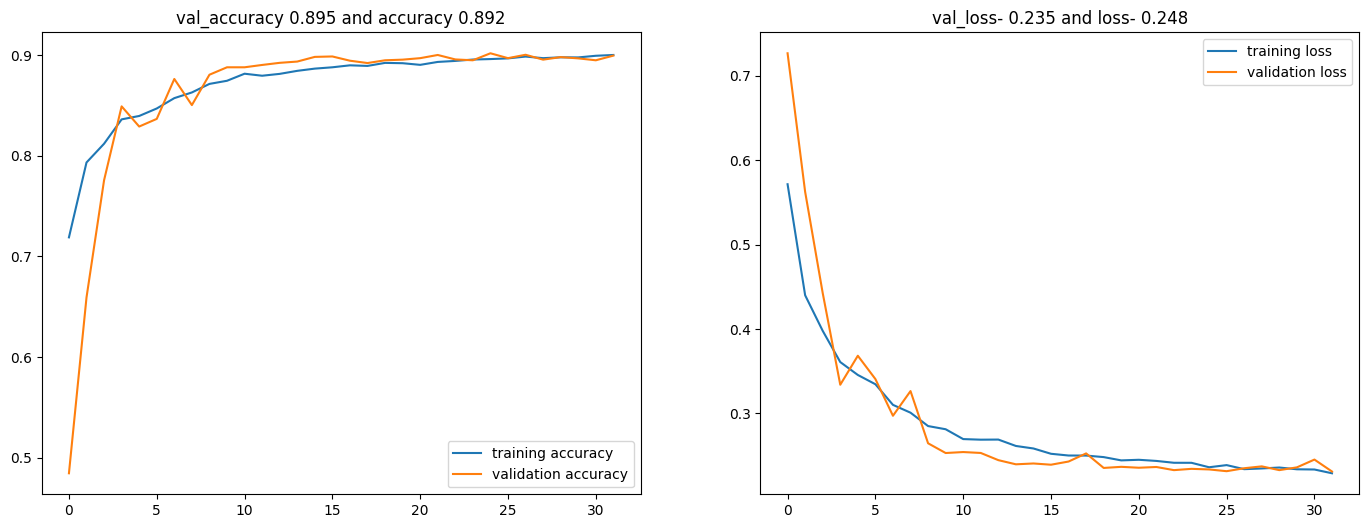

In [100]:
plt.subplots(nrows=1,ncols=2,figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(history.history['gender_out_accuracy'])
plt.plot(history.history['val_gender_out_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_gender_out_accuracy"][18],ndigits=3)} and accuracy {round(history.history["gender_out_accuracy"][18],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['gender_out_loss'])
plt.plot(history.history['val_gender_out_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_gender_out_loss"][18],ndigits=3)} and loss- {round(history.history["gender_out_loss"][18],ndigits=3)}')

###Saving and Testing

In [ ]:
model.save('Age&Gender-Prediction')
gender_model.save('Gender-Prediction')
age_model.save('Age-Prediction')